<a href="https://colab.research.google.com/github/Sharvari-Govele/LGMVIP-DataScience/blob/main/Task4/Develop_A_Neural_Network__That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [191]:
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# **Loading dataset**

In [192]:
(X_train,y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [193]:
len(X_train)

60000

In [194]:
len(X_test)

10000

In [195]:
X_train[0].shape

(28, 28)

In [196]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

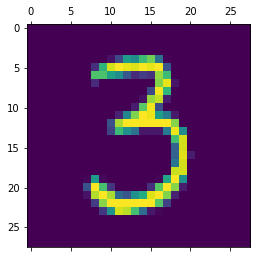

In [197]:
plt.matshow(X_train[50])

In [198]:
y_train[50]

3

In [199]:
#scaling dataset
X_train = X_train / 255
X_test = X_test / 255

In [200]:
X_train.shape

(60000, 28, 28)

Reshaping arrays from two dimensional array to one dimensional 

In [201]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [202]:
X_train_flattened.shape

(60000, 784)

In [203]:
X_test_flattened.shape

(10000, 784)

# **Model Training**

In [204]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4749 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9255


# **Model Evaluation**

In [205]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2668 - accuracy: 0.9259


[0.26681751012802124, 0.9258999824523926]

Here we got 92% accuracy.

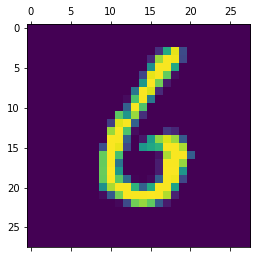

In [206]:
plt.matshow(X_test[50])

In [207]:
y_predicted = model.predict(X_test_flattened)
y_predicted[50]

array([6.3201910e-01, 1.6912329e-05, 2.0007241e-01, 1.3352397e-01,
       7.3985159e-03, 8.0356771e-01, 9.9812132e-01, 3.3837462e-06,
       9.0703607e-02, 9.8034739e-04], dtype=float32)

Array of ten scores is there and we need to look maximum score for our prediction . For that we use argmax function from numpy. 

In [208]:
np.argmax(y_predicted[50])

6

prediction is correct.